# Практическая работа 7. Основы Numpy. Построение графиков

## Numpy

###Выполнил студент ПИН-Б-З-22-1 Зинченко Сергей Алексеевич<br>


##Индивидуальное задание <br>
Напишите скрипт для решения задачи в блокноте Python Notebook или с
использованием локального интерпретатора в соответствии с индивидуальным
вариантом.

Импортируем файл согласно моему варианту(6)

In [1]:
!wget https://raw.githubusercontent.com/enikolaev/IT-and-Programming/main/data/pract7/p7_data_06.csv


--2025-06-20 20:08:40--  https://raw.githubusercontent.com/enikolaev/IT-and-Programming/main/data/pract7/p7_data_06.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38733 (38K) [text/plain]
Saving to: ‘p7_data_06.csv’

p7_data_06.csv      100%[===================>]  37.83K  --.-KB/s    in 0.01s   

2025-06-20 20:08:40 (3.56 MB/s) - ‘p7_data_06.csv’ saved [38733/38733]



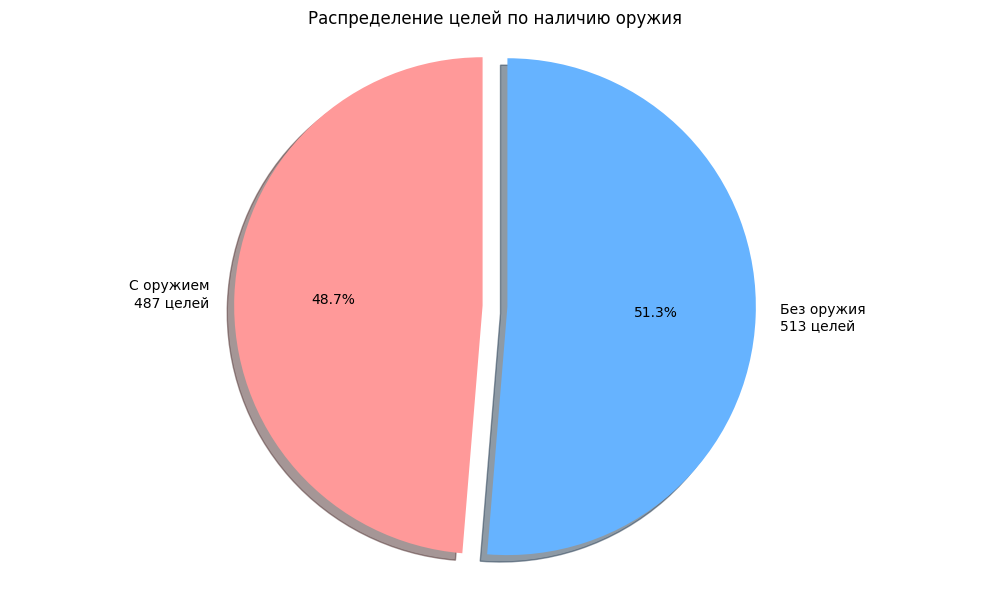

/tmp/ipython-input-3-747432742.py:65: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[i].boxplot(plot_data, patch_artist=True,
/tmp/ipython-input-3-747432742.py:65: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[i].boxplot(plot_data, patch_artist=True,
/tmp/ipython-input-3-747432742.py:65: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[i].boxplot(plot_data, patch_artist=True,


<Figure size 1200x800 with 0 Axes>

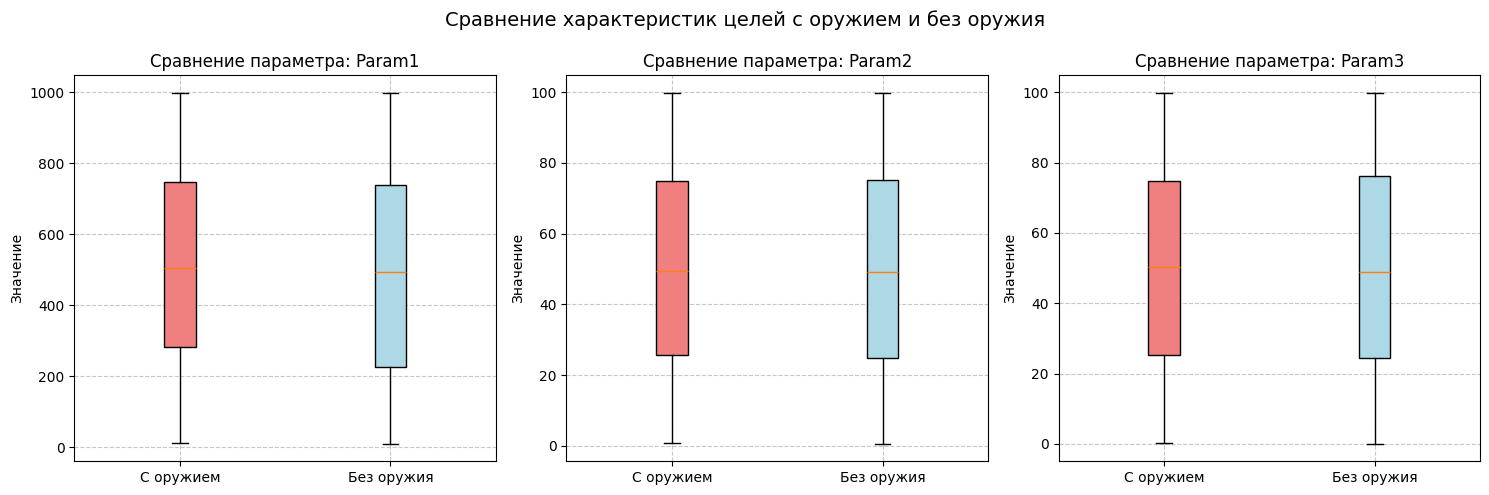

<Figure size 1200x600 with 0 Axes>

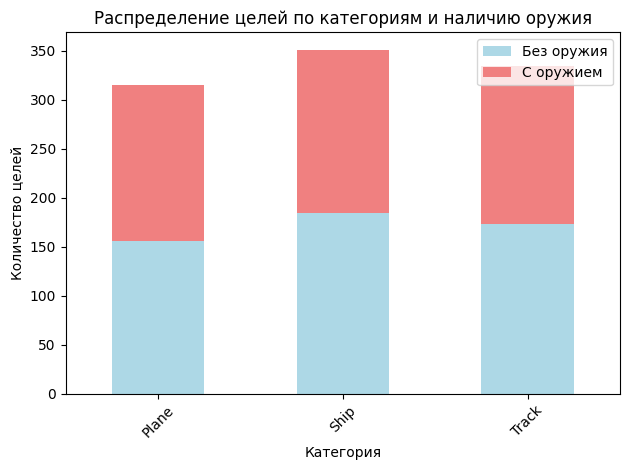

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из файла
data = pd.read_csv('p7_data_06.csv')

# Проверка и преобразование столбца HasWeapon
if 'HasWeapon' not in data.columns:
    raise ValueError("Файл данных не содержит столбца 'HasWeapon'")

# Преобразование в булев тип, если необходимо
if data['HasWeapon'].dtype != bool:
    try:
        data['HasWeapon'] = data['HasWeapon'].astype(bool)
    except ValueError:
        # Попробуем преобразовать через строковые значения
        data['HasWeapon'] = data['HasWeapon'].str.lower().map({
            'true': True, 'yes': True, '1': True, '+': True, 'да': True,
            'false': False, 'no': False, '0': False, '-': False, 'нет': False
        })

# Разделение данных на две группы: с оружием и без оружия
weapon_data = data[data['HasWeapon'] == True]
no_weapon_data = data[data['HasWeapon'] == False]

# 1. Первый график: Количество целей с оружием и без оружия
plt.figure(figsize=(10, 6))

# Круговая диаграмма
sizes = [len(weapon_data), len(no_weapon_data)]
labels = [f'С оружием\n{sizes[0]} целей', f'Без оружия\n{sizes[1]} целей']
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # Выделяем сектор "С оружием"

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Обеспечиваем круглую форму
plt.title('Распределение целей по наличию оружия')
plt.tight_layout()
plt.show()

# 2. Второй график: Сравнение параметров целей с оружием и без
plt.figure(figsize=(12, 8))

# Определение числовых параметров для сравнения
numeric_cols = data.select_dtypes(include=['number']).columns.tolist()

if not numeric_cols:
    raise ValueError("В данных отсутствуют числовые столбцы для сравнения")

# Создаем сетку графиков
num_plots = min(4, len(numeric_cols))  # Максимум 4 графика
fig, axes = plt.subplots(1, num_plots, figsize=(15, 5))

# Если только один график, преобразуем axes в массив
if num_plots == 1:
    axes = [axes]

# Строим boxplot для каждого числового параметра
for i, col in enumerate(numeric_cols[:num_plots]):
    # Создаем данные для boxplot
    plot_data = [weapon_data[col].dropna(), no_weapon_data[col].dropna()]

    # Строим boxplot
    bp = axes[i].boxplot(plot_data, patch_artist=True,
                         labels=['С оружием', 'Без оружия'])

    # Настраиваем цвета
    colors = ['lightcoral', 'lightblue']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    # Настраиваем график
    axes[i].set_title(f'Сравнение параметра: {col}')
    axes[i].set_ylabel('Значение')
    axes[i].grid(True, linestyle='--', alpha=0.7)

plt.suptitle('Сравнение характеристик целей с оружием и без оружия', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

# 3. Дополнительный график: Сравнение по категориям
if 'Category' in data.columns:
    plt.figure(figsize=(12, 6))

    # Группируем по категориям и наличию оружия
    category_weapon = data.groupby(['Category', 'HasWeapon']).size().unstack()

    # Строим столбчатую диаграмму
    category_weapon.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'])

    plt.title('Распределение целей по категориям и наличию оружия')
    plt.xlabel('Категория')
    plt.ylabel('Количество целей')
    plt.legend(['Без оружия', 'С оружием'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##Контрольные вопросы

1. Чем список python отличается от массива numpy?


Список Python и массив Numpy имеют ряд существенных отличий:

1. **Тип данных**:
   - Список Python является стандартным типом данных в Python, который может содержать элементы разных типов (строки, числа, другие списки и т.д.).
   - Массив Numpy является специализированным типом данных, который предназначен для хранения однородных данных (все элементы одного типа).

2. **Производительность**:
   - Операции над списками Python могут быть медленнее, так как списки являются динамическими структурами данных и не оптимизированы для вычислений.
   - Операции над массивами Numpy значительно быстрее, так как Numpy использует оптимизированные для вычислений структуры данных и поддерживает векторизованные операции.

3. **Функциональность**:
   - Списки Python имеют ограниченный набор методов для работы с данными (append, remove, sort и т.д.).
   - Массивы Numpy предоставляют широкий спектр методов и функций для математических операций, линейной алгебры, статистики и других вычислений.

4. **Индексация и срезы**:
   - Индексация и срезы в списках Python работают аналогично массивам, но могут быть менее эффективными.
   - В массивах Numpy индексация и срезы оптимизированы для быстрого доступа к элементам.

5. **Размер и потребление памяти**:
   - Списки Python могут потреблять больше памяти, так как они хранят дополнительную информацию о типах элементов и размерах.
   - Массивы Numpy более компактны и эффективно используют память, так как они хранят только данные одного типа.

Пример списка Python<br>
```
python_list = [1, 2, 3, 4, 5]
```
Пример массива Numpy<br>
```
import numpy as np
numpy_array = np.array([1, 2, 3, 4, 5])
```


2. Продемонстрируйте варианты создания массива numpy: из списка, как
диапазон с заданным шагом, массив нуле, единиц.


In [ ]:
import numpy as np

# создание массива из списка
list_data = [1, 2, 3, 4, 5]
array_from_list = np.array(list_data)
print("Массив из списка:", array_from_list)
# создание массива как диапазон с заданным шагом
array_from_range = np.arange(0, 10, 2)  # Диапазон от 0 до 10 с шагом 2
print("Массив как диапазон с шагом:", array_from_range)
# создание массива, заполненного нулями
zeros_array = np.zeros((3, 3))  # массив 3x3 заполненный нулями
print("Массив, заполненный нулями:\n", zeros_array)
# создание массива, заполненного единицами
ones_array = np.ones((2, 4))  # массив 2x4 заполненный единицами
print("Массив, заполненный единицами:\n", ones_array)

Массив из списка: [1 2 3 4 5]
Массив как диапазон с шагом: [0 2 4 6 8]
Массив, заполненный нулями:
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Массив, заполненный единицами:
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]]


3. Продемонстрируйте выполнение векторных операций с массивами numpy:
умножение вектора на число, сложение векторов.


In [ ]:
import numpy as np
# создаем два массива numpy
vector1 = np.array([1, 2, 3])
vector2 = np.array([4, 5, 6])
# умножение вектора на число
scalar = 2
multiplied_vector = vector1 * scalar
print("Умножение вектора на число:", multiplied_vector)
# сложение векторов
added_vectors = vector1 + vector2
print("Сложение векторов:", added_vectors)

Умножение вектора на число: [2 4 6]
Сложение векторов: [5 7 9]


4. Реализуйте построение векторов numpy с использованием генераторов
случайных чисел.


In [ ]:
import numpy as np
# устанавливаем фиксированное значение для воспроизводимости результатов
np.random.seed(0)
# создание вектора случайных чисел из стандартного нормального распределения
random_vector_normal = np.random.normal(loc=0, scale=1, size=5)
print("Вектор случайных чисел из стандартного нормального распределения:", random_vector_normal)
# создание вектора случайных чисел из равномерного распределения
random_vector_uniform = np.random.uniform(low=0, high=1, size=5)
print("Вектор случайных чисел из равномерного распределения:", random_vector_uniform)
# создание вектора случайных целых чисел
random_vector_integers = np.random.randint(low=1, high=10, size=5)
print("Вектор случайных целых чисел:", random_vector_integers)

Вектор случайных чисел из стандартного нормального распределения: [1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]
Вектор случайных чисел из равномерного распределения: [0.43758721 0.891773   0.96366276 0.38344152 0.79172504]
Вектор случайных целых чисел: [8 9 2 6 9]


5. Перечислите основные типы диаграмм matplotlib и функции, которые
реализуют построение графиков данных типов.

Линейный график: plt.plot(x, y)

Гистограмма: plt.hist(data, bins)

Точечный график: plt.scatter(x, y)

Столбчатая диаграмма: plt.bar(x, height)

Горизонтальная столбчатая диаграмма: plt.barh(y, width)

Круговая диаграмма: plt.pie(sizes, labels=labels)

Ящик с усами: plt.boxplot(data)

Контурный график: plt.contour(X, Y, Z)

Тепловая карта: plt.imshow(Z, cmap='viridis')

График функции: plt.plot(x, f(x))